In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
dataset_path='dataset/'

# 读取数据属性表
df_data_attr=pd.read_csv('list_attr_celeba.csv')
print('属性表')
for i, j in enumerate(df_data_attr.columns):
    print(i, j)
df_data_attr.head()

属性表
0 image_id
1 5_o_Clock_Shadow
2 Arched_Eyebrows
3 Attractive
4 Bags_Under_Eyes
5 Bald
6 Bangs
7 Big_Lips
8 Big_Nose
9 Black_Hair
10 Blond_Hair
11 Blurry
12 Brown_Hair
13 Bushy_Eyebrows
14 Chubby
15 Double_Chin
16 Eyeglasses
17 Goatee
18 Gray_Hair
19 Heavy_Makeup
20 High_Cheekbones
21 Male
22 Mouth_Slightly_Open
23 Mustache
24 Narrow_Eyes
25 No_Beard
26 Oval_Face
27 Pale_Skin
28 Pointy_Nose
29 Receding_Hairline
30 Rosy_Cheeks
31 Sideburns
32 Smiling
33 Straight_Hair
34 Wavy_Hair
35 Wearing_Earrings
36 Wearing_Hat
37 Wearing_Lipstick
38 Wearing_Necklace
39 Wearing_Necktie
40 Young


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


50
img shape: h: 218, w: 178, c: 3


Text(0.5, 1.0, 'Raw Img')

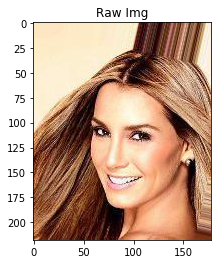

In [3]:
# 读取图片
img_list=os.listdir(dataset_path)

# print(img_list[:3])

dataset_len=50

img_list=img_list[:dataset_len]
print(len(img_list))

im1=Image.open(dataset_path+img_list[0])
h,w,c=np.shape(im1)
print('img shape: h: %d, w: %d, c: %d'%(h,w,c))
plt.figure(1)
plt.imshow(im1)
plt.title("Raw Img")

new shape: h: 218, w: 178


Text(0.5, 1.0, 'Resized Gray Img')

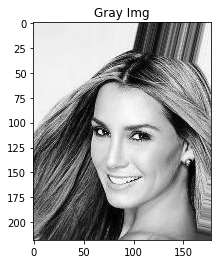

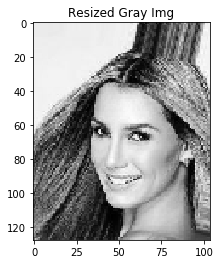

In [4]:
# 数据预处理方法
# plt.subplot(1,2,1)
# plt.imshow(im1)
# plt.title("Raw Img")

# resize to new h,w
img_h=int(128)
img_w=int((w/h)*img_h)


img = im1.convert("L")
print('new shape: h: %d, w: %d'%(np.shape(img)))
plt.imshow(img, cmap = plt.cm.gray)
plt.title("Gray Img")

img = img.resize((img_w,img_h))
# print('new shape: h: %d, w: %d'%(img_h,img_w))
plt.figure(2)
# plt.subplot(1,2,2)
plt.imshow(img, cmap = plt.cm.gray)
plt.title("Resized Gray Img")

Text(0.5, 1.0, 'Rotation 180')

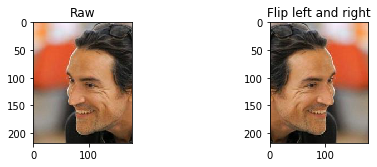

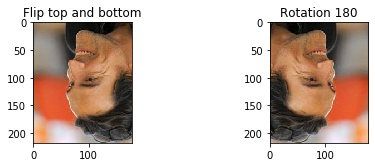

In [7]:
# 数据扩充方法

im1=Image.open(dataset_path+img_list[40])

# 图像旋转与翻转
# 原图
plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(im1)
plt.title("Raw")
# 左右翻转
im_flip_lr= im1.transpose(Image.FLIP_LEFT_RIGHT)
plt.subplot(1,3,3)
plt.imshow(im_flip_lr)
plt.title("Flip left and right")
plt.figure(2)
# 上下翻转
im_flip_tb= im1.transpose(Image.FLIP_TOP_BOTTOM)
plt.subplot(1,3,1)
plt.imshow(im_flip_tb)
plt.title("Flip top and bottom")
# 180度
im_rotate=im1.rotate(180)
plt.subplot(1,3,3)
plt.imshow(im_rotate)
plt.title("Rotation 180")